# Regresión lineal en Python
## El paquete scikit-learn para regresión lineal y la selección de rasgos

In [1]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import pandas as pd
import numpy as np

In [3]:
df_viv = pd.read_csv("../Material/Prec_viv_revit.csv")

In [4]:
df_viv.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
1,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
2,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
3,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
4,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000


In [6]:
df_viv.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'X1stFlrSF', 'X2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDri

In [26]:
X = df_viv.drop(["SalePrice","Id"], axis=1)
Y = df_viv["SalePrice"]

In [27]:
X.shape, Y.shape

((1110, 79), (1110,))

In [28]:
#Separando datos numericos y categoricos

x_numericos = X.select_dtypes(include=['float64', "int64"])
x_categoricos = X.select_dtypes(exclude=['float64', "int64"])


In [29]:
#Tratamiento Variables Numericas
for col in x_numericos.columns:
    x_numericos[col].fillna(x_numericos[col].mean(), inplace=True)

c:\users\johnny valenzuela\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [51]:
#Dummizando variables categoricas

x_categoricos_dummmies = pd.get_dummies(x_categoricos, drop_first=True)


In [52]:
df_variables = pd.concat([x_numericos, x_categoricos_dummmies], axis=1)

In [53]:
df_variables.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
1,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
2,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0
3,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,0,0,0,0,1,0,0,0,1,0
4,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,0,0,0,0,1,0,0,0,1,0


In [54]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, 10, step=1)
selector = selector.fit(df_variables,Y)

In [55]:
selector.support_

array([ True,  True, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [56]:
selector.ranking_

array([  1,   1, 216,   1,   1,   1,   1,  44,  64, 156, 155,  23,   2,
         6,  35,  46,   4, 113, 133, 210,   1,  25,  77,   1,  41,  57,
        12,  34,  11,  51, 141,  14, 152, 180,  81,  31,  63, 108,  83,
        45, 213, 110, 115, 220,  21,  95, 214, 219, 194,  99,  74, 166,
       101, 132, 221, 229,  93,  58, 199,  37,  27, 112, 127, 120, 116,
        59,  38, 174,  53,  54,  15, 144, 228,  65,  55,  56,  71, 109,
       128,  28,  13, 150, 134, 106, 227, 196, 163, 189, 208, 188, 187,
       224, 218,  36,  85, 129,  89,  78, 143, 179, 142, 117, 215,  24,
       226,  26, 175, 202, 211, 204, 206, 207, 205, 177, 151, 225,  49,
       186,  70,  29, 131,  50, 198,  90,  61, 122,  97, 185, 167,  91,
       181,  67,  39, 157, 118, 192,  33, 171,  96,  69,  62, 111,  42,
        60,  18, 126,   9,   1, 158,  79, 200,  72,  19,  17, 139, 173,
       148, 140,  52,  22,  82, 172, 119,  16,  76,   5,  66,   3,  92,
        68, 100, 107, 168, 135, 105, 125, 222, 149, 201, 182,  8

In [59]:
df_variables.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=240)

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
df_variables.columns[selector.support_]

Index(['MSSubClass', 'LotFrontage', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BedroomAbvGr', 'Fireplaces', 'ExterQual_TA',
       'FireplaceQu_Gd'],
      dtype='object')

In [63]:
X_pred = df_variables[['MSSubClass', 'LotFrontage', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BedroomAbvGr', 'Fireplaces', 'ExterQual_TA',
       'FireplaceQu_Gd']]

In [64]:
lm = LinearRegression()
lm.fit(X_pred, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [65]:
lm.intercept_

-1162573.3980856563

In [66]:
lm.coef_

array([  -110.00632919,    327.91271571,  28904.85423036,   1919.67733765,
          253.52466395,    310.86311573,   7376.5833023 ,  20610.01386559,
       -19792.89989184,   5008.40074902])

In [68]:
lm.score(X_pred, Y)

0.7072662661438613

In [69]:
lm.predict(X_pred)[:10]

array([237447.22714958, 187188.62218635, 278100.01723824, 126951.77866411,
       279749.28764537, 224424.21211944, 192501.6964516 , 122911.06383851,
       123661.86034625, 116209.88021621])

In [70]:
df_viv["pred"] = lm.predict(X_pred)

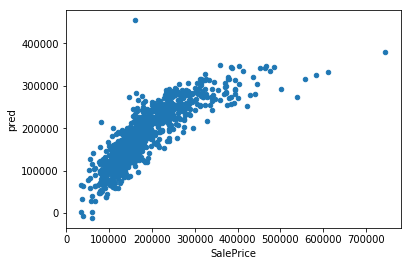

In [71]:
df_viv.plot(kind = "scatter", x = "SalePrice", y = "pred")